# DSCI 100 Project: Predicting Heart Disease Diagnoses with Classification Models


# Introduction:

Everyone has at some point heard, either from a doctor or a person who has visited one, about the risk factors that lead to heart disease. It is one of the most prevalent and devastating diseases in North America. In 2021, it was responsible for the deaths of 695,000 people and $239 million dollars in damage funding in the United States alone (Guannaciello & Marit, 2023). Around 805,000 people have heart attacks yearly in the US and every year younger individuals with supposedly healthier bodies are being diagnosed for it and are dying from it (Guannaciello & Marit, 2023). Heart disease is an umbrella term for many conditions, but colloquially and medically it is used to refer to Coronary Artery Disease. For the sake of consistency we will continue using the term "heart disease". Heart disease occurs when plaque accrues in an individual's vital arteries, reducing blood flow and increasing blood pressure. When a person's blood flow is reduced excessively, this can lead to heart attacks, most of which are often lethal (Guannaciello & Marit, 2023). Some individuals may survive one heart attack, but that doesn't rid them of the disease, fully purging it requires cardiac rehabilitation. A long and arduous physical therapy project that takes months if not years (Virani & Alonso, 2023). It involves a tailored excercise program, a health education program, and consistent lifestyle and stress managmenet counselling (Virani & Alonso, 2023). In summary, it is a serious and deadly illness that is rampant in our society, and those who survive, have their lives altered forever.

With that said, knowing the physiological conditions that cause heart disease is the key to prevention and eradication. Most professionals cite things like blood pressure, obesity, blood sugar level, and diabetes (Perret-Guillaume et al., 2009) as well as blood-cholesterol concentration (Kinosian et al., 2009) and the like as factors that cause heart disease. With this in mind, we'll be working with the UC Irvine Heart Disease dataset (Janosi et al., 1989) to answer our question: **Can age, cholesterol levels and maximum heart rate be used to predict a heart disease diagnosis using K-NN classification?**
We are expecting cholesterol levels and maximum heart rate to impact a heart diagnosis the most, however we are including age as a predictor since we hypothesize that it may be a secondary factor that most professionals did not cite in our research.

The dataset contains fourteen variables age, sex, chest pain type, resting blood pressure in mmHg(millimeters of mercury), cholesterol levels in mg/dl(milligrams per deciliter), whether the patient's fasting blood sugar is above 120mg/dl, type of resting electrocardiographic results, patient's maximum heart rate(bpm), whether exercise induced chest pain in a patient, the ST depression induced by exercise, the slope of the ST segment at peak exercise, the amount of blood vessels analyzed for a patient, whether the patient has Thalassemia(blood disorder), and finally heart disease diagnosis (Janosi et al., 1989).

# Methods and Results

We will now begin the data analysis, explaining every step as we go. Note that we will treat someone having heart disease as our "positive" classification, and someone not having it as our "negative" classification.

**Importing relevant libraries:**

In [1]:
library(tidyverse)
library(tidymodels)
library(GGally)
library(repr)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

**Reading in our data from the web:**

In [2]:
#Dataset reading
col_names <-c("age", "sex", "chest_pain_type", "resting_blood_pressure", "cholesterol_concentration", "fasting_blood_sugar_greater",
              "resting_electro", "max_bpm", "induced_pain", "ST_depression","slope_of_st_seg", 
              "amount_of_vessels_checked", "thalassemia", "diagnosis")

# append two dataframes to make an approproately sized dataset (cleveland and hungary together)
heart_disease_data <- read_csv("https://github.com/dislasriv/DSCI-100-Group-22-Project/raw/main/dataset/heart.csv", 
                               col_names = c(col_names), skip = 1) 

Rows: 1025 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): age, sex, chest_pain_type, resting_blood_pressure, cholesterol_con...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


**Cleaning and wrangling the data into a tidy format** (returns a sample at the end to show tidy format)

In [3]:
heart_disease_data <- heart_disease_data |>                     
                        #Selection of relevant columns
                        select(age, cholesterol_concentration, max_bpm, diagnosis) |>
                        #Mutations to make data more easily readable
                       mutate(diagnosis = as_factor(diagnosis)) |>
                       mutate(diagnosis =fct_recode(diagnosis, "Yes" = "1", "No" = "0"))

head(heart_disease_data)

age,cholesterol_concentration,max_bpm,diagnosis
<dbl>,<dbl>,<dbl>,<fct>
52,212,168,No
53,203,155,No
70,174,125,No
61,203,161,No
62,294,106,No
58,248,122,Yes


**Fig 1.0:** head of tidy data

In [4]:
tail(heart_disease_data)

age,cholesterol_concentration,max_bpm,diagnosis
<dbl>,<dbl>,<dbl>,<fct>
47,204,143,Yes
59,221,164,Yes
60,258,141,No
47,275,118,No
50,254,159,Yes
54,188,113,No


**Fig 1.1:** tail of tidy data

**Setting the seed and splitting the data into training and testing sets** (in our proposal feedback, we were told to set the seed at the data split)

In [5]:
set.seed(2001) 
data_split <- initial_split(heart_disease_data, prop = 0.75, strata = diagnosis)
training_set <- training(data_split)
testing_set <- testing(data_split)

## Exploratory analysis section

**What are the diagnosis proportions in our data?**

In [6]:
num_obs <- training_set |>
            group_by(diagnosis) |>
            summarize(observation_count = n())
colnames(num_obs) <- c("Has heart disease?","Number of diagnoses in set")
num_obs

Has heart disease?,Number of diagnoses in set
<fct>,<int>
No,374
Yes,394


**Fig 2:** diagnosis prooprtions in training data.

Here we see that the proportion of diagnoses in our set are roughly equal. This is relevant to our analysis in that it shows that we won't need to perform any oversampling for K-NN to work well, it also gives us an idea of the observation ratios we want our model to create when we validate and test it (since the intiial split function used above guarantees similar ratios in training and testing data).

**What are the means, minimums and maximums of our predictors?**

In [7]:
mean_min_max <- select(training_set, age, cholesterol_concentration, max_bpm) |>
                pivot_longer(age:max_bpm,
                             names_to = "predictor",
                             values_to = "value") |>
                group_by(predictor) |>
                summarize(mean = mean(value,na.rm = TRUE), maximum = max(value,na.rm = TRUE), minimum = min(value,na.rm = TRUE))
             
mean_min_max

predictor,mean,maximum,minimum
<chr>,<dbl>,<dbl>,<dbl>
age,54.08464,77,29
cholesterol_concentration,244.23177,564,126
max_bpm,149.07161,202,71


**Fig 3:** mean, minimum and maximum of all our predictors

In regards to our analysis, this table here gives us a good idea of what kinds of values are expected or extreme for each predictor, which can help us identify unexpected behaviour if extreme values don't yield expected classifications.

**Do trends in our predictors influence heart disease diagnoses? (visualization)**

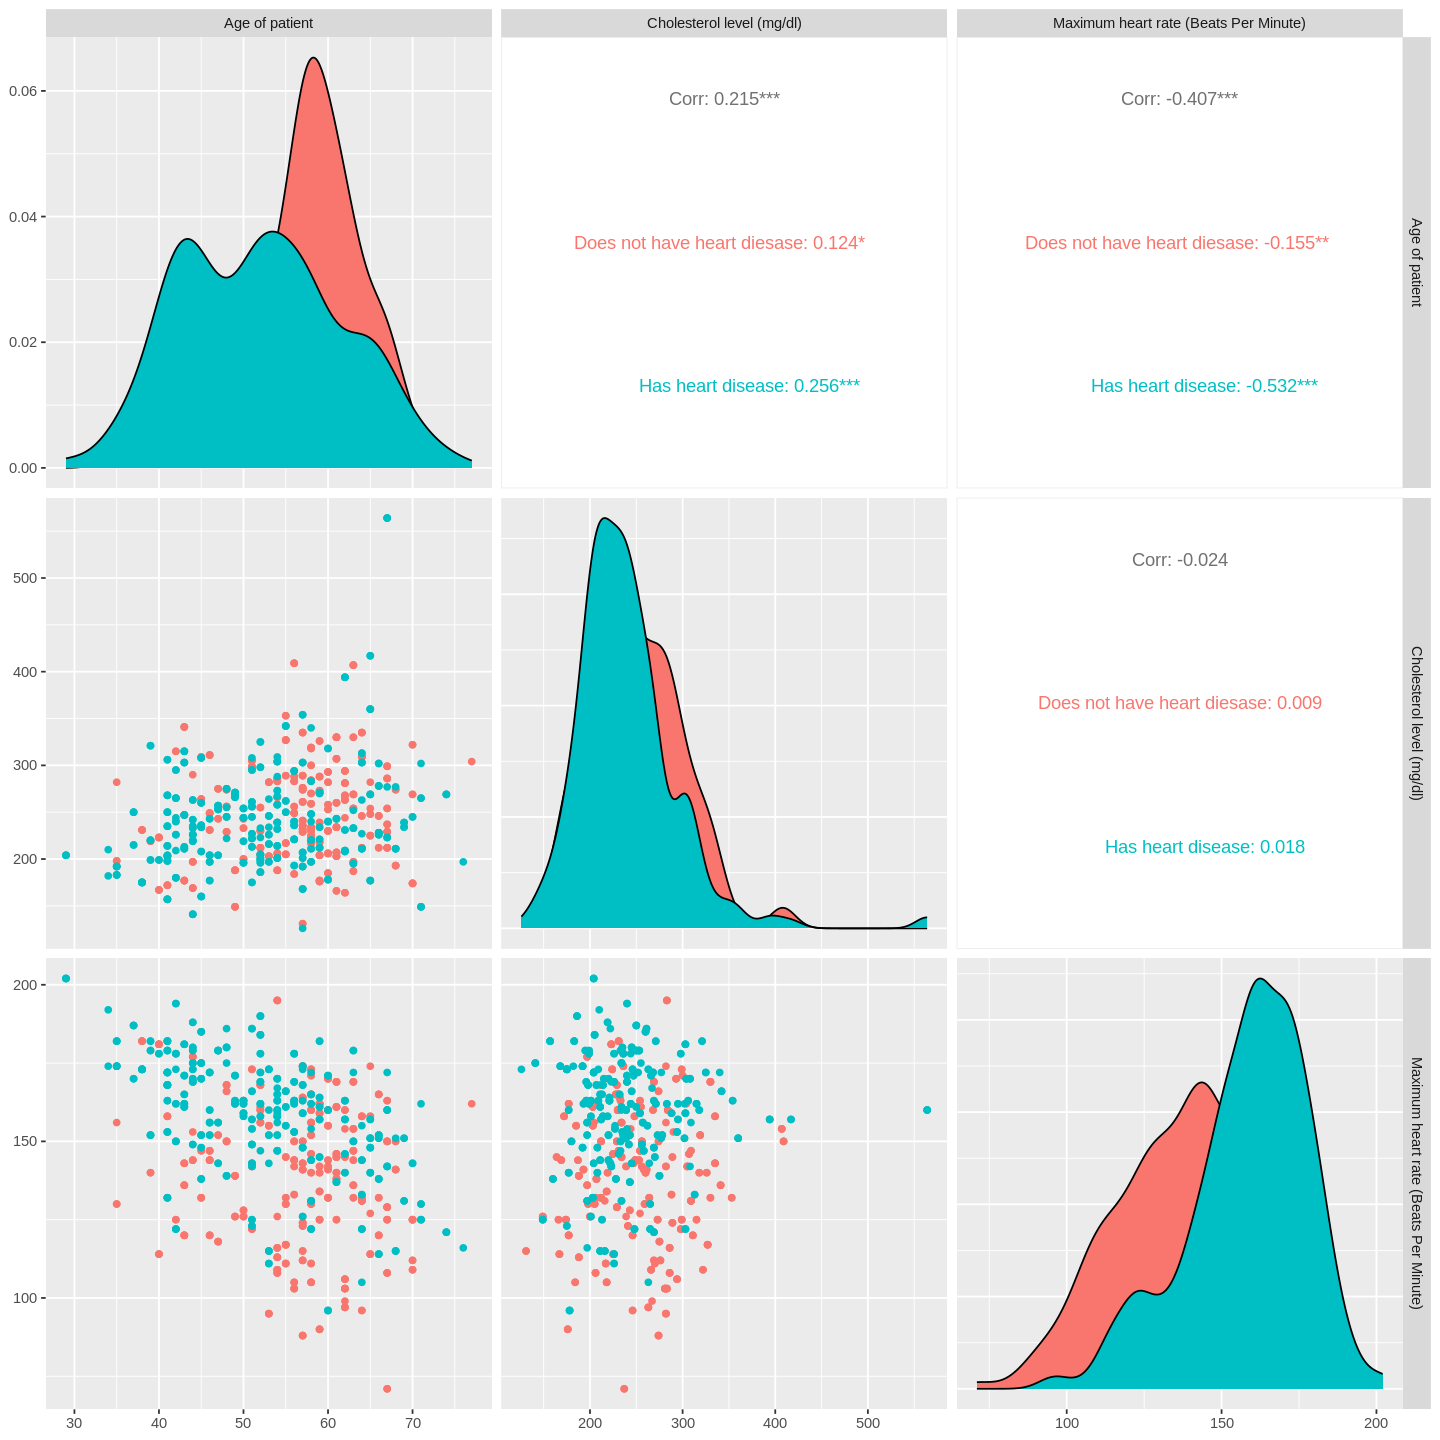

In [8]:
options(repr.plot.width = 12, repr.plot.height = 12)
pair_plot <-  mutate(training_set, diagnosis = fct_recode(diagnosis, "Has heart disease" = "Yes", 
                                                          "Does not have heart diesase" = "No")) |>
               ggpairs(aes(color = diagnosis), columns = 1:3, 
                       columnLabels = c("Age of patient", "Cholesterol level (mg/dl)", "Maximum heart rate (Beats Per Minute)"))
pair_plot

**Fig 4:** comparison of our predictors as a pair plot

Above, we have made scatterplots comparing every one of our predictors to each other in pairs.

Most trends between variables seem to have little influence on heart disease diagnosis, however in the plots that compare age to maximum heart rate, we see that most observations of heart disease seem to occur in individuals aged ~35 to ~60 before they become more diffuse. This may be indicative that age influences heart disease diagnosis.

Beyond that, in the plot between maximum heart rate and age we see a weak negative relationship between the variables, we also see that as this relationship progresses the observations progress from being mainly positive for heart disease to negative. This trend may be indicative that older people with lower heart rates are less prone to heart disease.

From the two observations we have made above, we can begin to establish patterns of expected behaviour in our classifier. That being that older individuals will likely be classified as not having heart disease, and that older people with lower heart rates may be too.

## K-NN Classification

We will now begin the K-NN classification process. We will train a K-NN classification model in R, test it, and visualize its results. Based on how high it's accuracy and recall are, we will judge whether or not our predictors can accurately predict heart disease. Lets begin by finding the optimal K amount of neighbors for our classification model.

### **Tuning K: Creating a recipe, model, and workflow to perform cross validation**

Lets do 5 fold cross-validation trying K values from 1 to 25.

In [9]:

grid <- tibble(neighbors = 1:25)

heart_disease_recipe <- recipe(diagnosis ~ ., data = training_set)

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")

heart_vfold <- vfold_cv(training_set, v = 5, strata = diagnosis)

knn_metrics <- workflow() |>
                 add_recipe(heart_disease_recipe) |>
                 add_model(knn_spec) |>
                 tune_grid(resamples = heart_vfold, grid = grid) |>
                 collect_metrics()

head(knn_metrics)

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.9570232,5,0.007856938,Preprocessor1_Model01
1,roc_auc,binary,0.9577056,5,0.007679658,Preprocessor1_Model01
2,accuracy,binary,0.9570232,5,0.007856938,Preprocessor1_Model02
2,roc_auc,binary,0.9451506,5,0.010344370,Preprocessor1_Model02
3,accuracy,binary,0.8268968,5,0.015270366,Preprocessor1_Model03
3,roc_auc,binary,0.9032446,5,0.014046972,Preprocessor1_Model03


**Fig 5:** sample of our tuning metrics.

**Now lets find the K value that makes our classifier as accurate as possible:**

In [10]:
best_k <- knn_metrics |>
          filter(.metric == "accuracy") |>
          slice_max(mean, n = 1) |>
          select(neighbors, .metric, mean)
best_k

neighbors,.metric,mean
<int>,<chr>,<dbl>
1,accuracy,0.9570232
2,accuracy,0.9570232


**Fig 6:** Observations showing optimal accurate K values, oddly there is more than 1.

Here we see that K = 1 and K = 2 yield the same high accuracy, we will choose K = 1 to prevent any classification ties.

### **Making our final model and training it:**

Lets repeat the above for our tuned K.

In [11]:
heart_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 1) |>
            set_engine("kknn") |>
            set_mode("classification")

heart_fit <- workflow() |>
                 add_recipe(heart_disease_recipe) |>
                 add_model(heart_spec) |>
                 fit(data = training_set)

### **Running our model on testing data and evaluating its performance:**

We will now test our tuned model with the given predictors on the testing set. To evaluate its performance on data it has not seen before, we will yield accuracy metrics and make a confusion matrix.

In [12]:
heart_predictions <- predict(heart_fit, testing_set) |>
                    bind_cols(testing_set)

model_metrics <- metrics(heart_predictions, truth = diagnosis, estimate = .pred_class) |>
                 filter(.metric == "accuracy")

model_conf_mat <- heart_predictions |>
                        conf_mat(truth = diagnosis, estimate = .pred_class) 

#precision
model_metrics

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.9766537


**Fig 6:** observation showing the accuracy of our model on testing data.

In [13]:
model_conf_mat

          Truth
Prediction  No Yes
       No  122   3
       Yes   3 129

**Fig 7:** confusion matrix of our model when run on testing data.

Note that "No" means a patient does not have heart disease, and "Yes" means a patient does have it. We see that our model has an accuracy of about 97.7%, a recall of 129/132 = 97.7%, and a precision of 129/132 = 97.7%. However precision is less relevant to our analysis, since with respect to disease we don't care as much about false positives as we do false negatives, which recall accounts for. We care most about accurately predicting positive cases.

## Visualization of our data analysis:

Lets create the same pair plot from above, but this time, lets use the heart_predictions (dataframe holding testing data and our predictions) table and color by our predicted class labels.

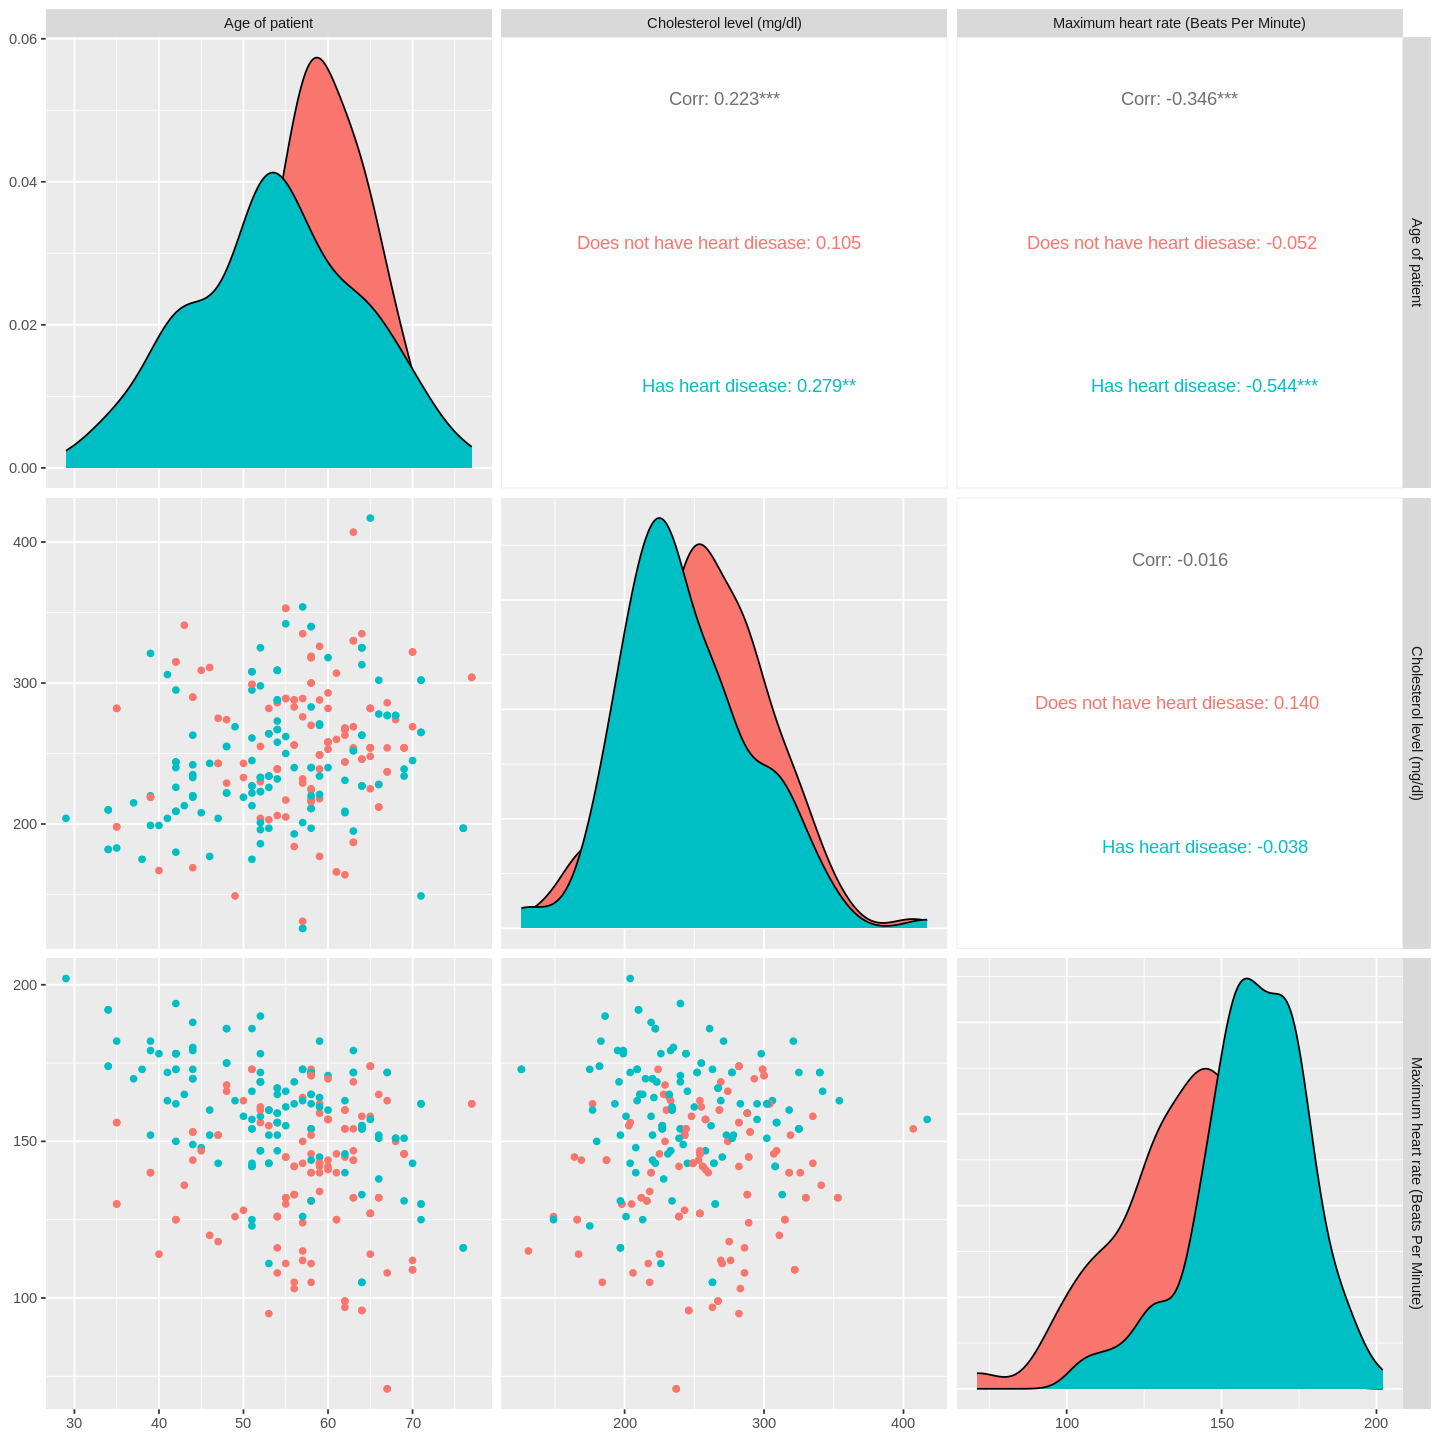

In [14]:
options(repr.plot.width = 12, repr.plot.height = 12)
pair_plot <-  mutate(heart_predictions, .pred_class = fct_recode(diagnosis, "Has heart disease" = "Yes", 
                                                          "Does not have heart diesase" = "No")) |>
               ggpairs(aes(color = .pred_class), columns = 2:4,
                       columnLabels = c("Age of patient", "Cholesterol level (mg/dl)", "Maximum heart rate (Beats Per Minute)")) 
pair_plot

**Fig 8:** Pair plot of testing data coloured by testing predictions.

This looks very similar to the plot we made in the exploratory analysis, albeit with our testing data instead. This shows that, to a reasonable extent, our classifier was able to notice the trends in our variables (that we pointed out during our data exploration) and segregate which parts of the trend corresponded to heart disease and which did not in order to replicate our first pair plot.

# Discussion

Overall, our classifier turned out to have exceptional accuracy (97.7%), recall (97.7%) and even precision (97.7%). Given that the classifier only missed 2.3% of positive cases (given our recall value). We believe that our predictors do in fact reliably predict a patient's diagnosis for heart disease, however should not be used as the sole basis for making a diagnosis. This is because, our classifier did not achieve 100% recall, and relative to heart disease, false negatives are extremely dangerous. Given all of this we can also conclude that while many doctors (relative to our research) do not consistently cite age as having an influence on heart disease, it is a reliable predictor. Despite it's inclusion, our metrics were very high, meaning it was not an irrelevant predictor. A secondary conclusion that we yielded was from our plots: seemingly younger people (aged 35 to 60) were more likely to have heart disease, as the bulk of our positive observation points were in this age range.

More or less this is what we expected to find, we were unsure that age would be a good predictor, but were already convinced that maximum heart rate and cholesterol concentration would be, based on Perret-Guillaume et al. (2009), as well as Kinosian et al. (1994) and their research. Finding out that our intuition regarding age was correct was a welcome validiation. However we were very surprised to find that heart disease diagnoses occurred more prominently in younger individuals (aged 35 to 60), as often, at least stereotypically older people are more prone to disease in general. We ended up coming to the grim, but hypothetical conclusion that it is entirely possible that most people with heart disease do not survive to an age of 60 and beyond, potentially explaining the lack of observations for the disease beyond that age.

Our findings regarding maximum heart rate and cholesterol being accurate predictors aren't too surprising, however discovering that age is a reliable predictor is a little bit more significant. From our experience, throughout our lives we have not heard of age being cited as having an influence on heart disease. This was further emphasized when we did not see it come up as such in our research. While doctors may be aware of this, many of us are not. Given our results, we believe that discoveries like this could emphasize how much influence age has on heart disease, potentially leading doctors to mention it as a risk more often to patients. Furthermore, our discovery that people aged between 35 to 60 most commonly have heart disease could possibly lead medical professionals to target their disease prevention campaigns to this age demographic. This then could potentially make their efforts more effective, and actively weaken the terrifying grip that heart disease has on society.

These discoveries could then lead to further questioning from society. People may want to know the proportion of heart disease diagnoses that are influenced by lifestyle (bad habits influencing risky cholesterol and heart rate among other risk factors not handled in our analysis) against those influenced by simply being in a certain age group (35-60 per our exploratory data analysis). From this they may also question whether predisposition exists for heart disease, leading some people to it despite how healthy or unhealthy their lifestyle is as they age. Out of our findings heart disease could become split into diagnoses influenced by age, diagnoses influenced by lifestyle, and those influenced by both. Society may also demand further evidence of our hypothetical conclusion above that most people with heart disease may not make it past an age of 60 years old.

# References

- Guannaciello, P., & Marit, J. (2023). Heart disease facts. Centers for Disease Control and Prevention. https://www.cdc.gov/heartdisease/facts.htm
  
- Janosi, A., Steinbrunn, C., Pfisterer, M., & Detrano, R. (1989). Heart Disease [Data Set]. UC Irvine. https://archive.ics.uci.edu/dataset/45/heart+disease

- Kinosian, B., Glick, H., & Garland G. (1994). Cholesterol and Coronary Heart Disease: Predicting Risks by Levels and Ratios. ACP Journals, 121(9), 100-107. https://doi.org/10.7326/0003-4819-121-9-199411010-00002
  
- Perret-Guillaume, C., Joly, L., & Benetos A. (2009). Heart Rate as a Risk Factor for Cardiovascular Disease. ScienceDirect, 52(1), 6-10. https://www.sciencedirect.com/science/article/pii/S0033062009000322
  
- Virani, S., & Alonso, A. (2023). About Heart Disease. Centers for Disease Control and Prevention.https://www.cdc.gov/heartdisease/about.htm#:~:text=What%20is%20heart%20disease%3F,can%20cause%20a%20heart%20attack.